In [1]:
import pandas as pd
open_source_8500 = pd.read_excel("../data/open_source_8500.xlsx") ## 舊名 IT-Ticket-Classification.xlsx
open_source_8500

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [2]:
import torch
import numpy as np

device=torch.device('cuda:0')
torch.cuda.get_device_name(0)

seed=123
torch.manual_seed(seed)
np.random.seed(seed)

# Paper步驟

In [3]:
callers = open_source_8500['Caller'].unique() 
callers.shape
open_source_8500.drop(["Caller",'Short description'],axis=1,inplace= True)
open_source_8500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8499 non-null   object
 1   Assignment group  8500 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


In [4]:
targetClassCnt=open_source_8500['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: count, dtype: float64

In [5]:
## 將樣本數少於10的組別歸類為一個新的組別 misc_grp

sample = open_source_8500.groupby(['Assignment group'])
regroup = []

for grp in open_source_8500['Assignment group'].unique():
    if sample.get_group((grp,)).shape[0] < 10:  # 改為元組形式 (grp,)
        regroup.append(grp)

print('Found {} groups which have under 10 samples'.format(len(regroup)))
open_source_8500['Assignment group'] = open_source_8500['Assignment group'].apply(
    lambda x: 'misc_grp' if x in regroup else x
)

# Unique Groups check 
open_source_8500['Assignment group'].unique()

Found 25 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

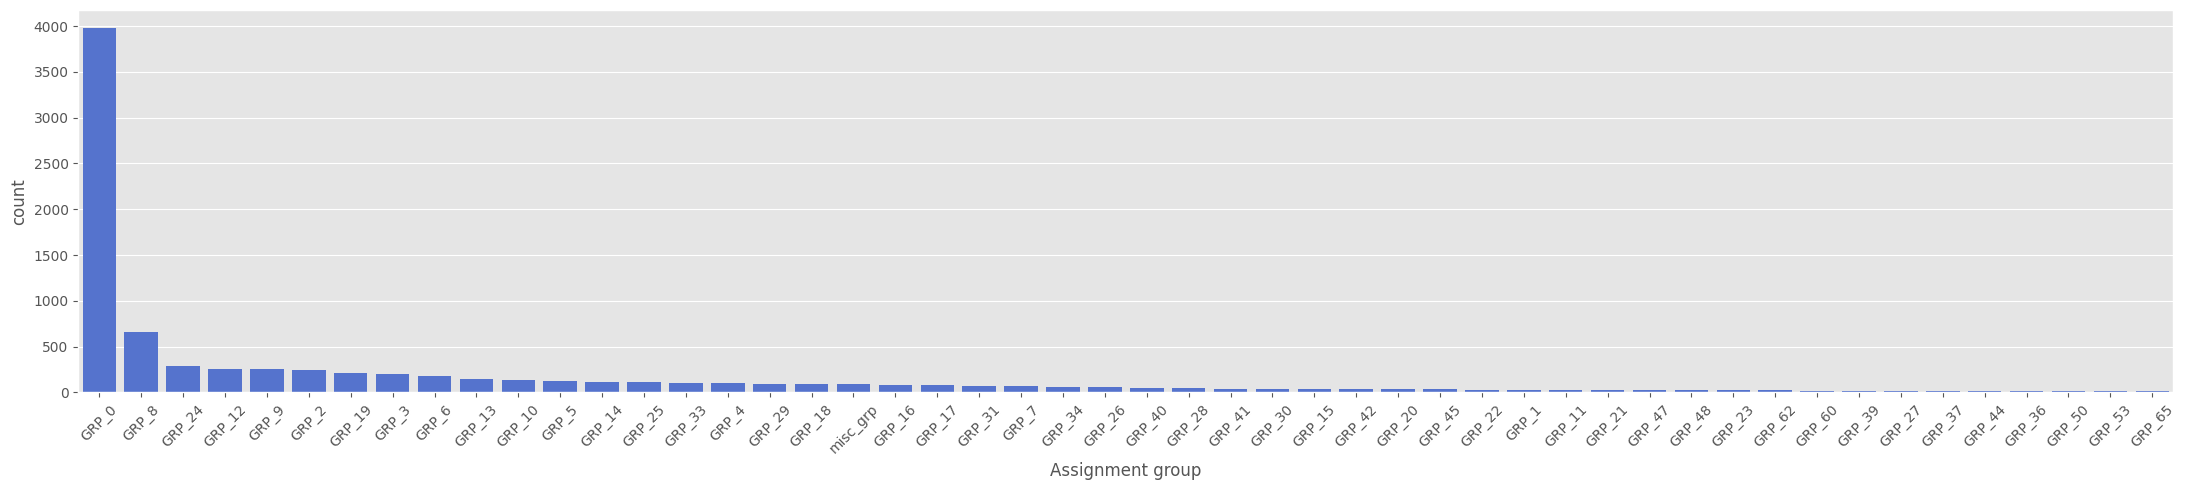

In [6]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

descending_order = open_source_8500['Assignment group'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=open_source_8500, color='royalblue', order=descending_order)
ax.tick_params(axis='x', rotation=45)  # 設置旋轉

plt.tight_layout()
plt.show()

In [7]:
#Fill 'Decsription' field entries that have null with blank space
open_source_8500['Description'] = open_source_8500['Description'].fillna(' ')

In [8]:
open_source_8500

,Description,Assignment group
0,-verified user details.(employee# & manager na...,GRP_0
1,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,GRP_29
8496,telephony_software issue,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62


# paper Description處理

In [9]:
import re 
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
open_source_8500['Description'] = open_source_8500['Description'].apply(clean_data)
open_source_8500

,Description,Assignment group
0,verified user details employee and manager nam...,GRP_0
1,xd xd xd hello team xd xd my meetings skype me...,GRP_0
2,xd xd xd hi xd xd cannot log on to vpn xd xd best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,xd xd xd good afternoon xd am not receiving th...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62


In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [11]:
open_source_8500.reset_index(drop=True,inplace=True)

open_source_8500['cleanText']=open_source_8500['Description'].map(lambda s:preprocess(s))

open_source_8500['cleanText']

0       verified user details employee manager name ch...
1       hello team meetings skype meetings etc appeari...
2                                     cannot log vpn best
3                                 unable access tool page
4                                             skype error
                              ...                        
8495    good afternoon receiving emails sent mail plea...
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    unable access machine utilities finish drawers...
8499    mehreren lassen sich verschiedene prgramdntyme...
Name: cleanText, Length: 8500, dtype: object

In [12]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
#otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
#itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
open_source_8500['Assignment_group_label'],grp_mapping_all_raw = labelencoder(open_source_8500['Assignment group'])

In [13]:
open_source_8500

,Description,Assignment group,cleanText,Assignment_group_label
0,verified user details employee and manager nam...,GRP_0,verified user details employee manager name ch...,0
1,xd xd xd hello team xd xd my meetings skype me...,GRP_0,hello team meetings skype meetings etc appeari...,0
2,xd xd xd hi xd xd cannot log on to vpn xd xd best,GRP_0,cannot log vpn best,0
3,unable to access hr tool page,GRP_0,unable access tool page,0
4,skype error,GRP_0,skype error,0
...,...,...,...,...
8495,xd xd xd good afternoon xd am not receiving th...,GRP_29,good afternoon receiving emails sent mail plea...,22
8496,telephony software issue,GRP_0,telephony software issue,0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset tifpdchb pedxruyf,0
8498,i am unable to access the machine utilities to...,GRP_62,unable access machine utilities finish drawers...,44


In [14]:
rows_with_nan = open_source_8500[open_source_8500['cleanText'] == '']
rows_with_nan

,Description,Assignment group,cleanText,Assignment_group_label
707,xd xd xd,GRP_3,,23
1049,the,GRP_17,,9
1054,the,GRP_17,,9
1081,,GRP_48,,38
1144,the,GRP_17,,9
...,...,...,...,...
8092,the,GRP_17,,9
8093,the,GRP_17,,9
8168,the,GRP_17,,9
8266,,GRP_30,,24


In [15]:
open_source_8500 = open_source_8500[open_source_8500['cleanText'].str.strip() != '']
open_source_8500

,Description,Assignment group,cleanText,Assignment_group_label
0,verified user details employee and manager nam...,GRP_0,verified user details employee manager name ch...,0
1,xd xd xd hello team xd xd my meetings skype me...,GRP_0,hello team meetings skype meetings etc appeari...,0
2,xd xd xd hi xd xd cannot log on to vpn xd xd best,GRP_0,cannot log vpn best,0
3,unable to access hr tool page,GRP_0,unable access tool page,0
4,skype error,GRP_0,skype error,0
...,...,...,...,...
8495,xd xd xd good afternoon xd am not receiving th...,GRP_29,good afternoon receiving emails sent mail plea...,22
8496,telephony software issue,GRP_0,telephony software issue,0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset tifpdchb pedxruyf,0
8498,i am unable to access the machine utilities to...,GRP_62,unable access machine utilities finish drawers...,44


In [16]:
targetClassCnt=open_source_8500['Assignment group'].value_counts()
targetClassCnt.describe()

count      50.000000
mean      167.600000
std       558.807769
min         7.000000
25%        25.000000
50%        44.500000
75%       117.500000
max      3963.000000
Name: count, dtype: float64

## Resample

<Axes: xlabel='Assignment group', ylabel='count'>

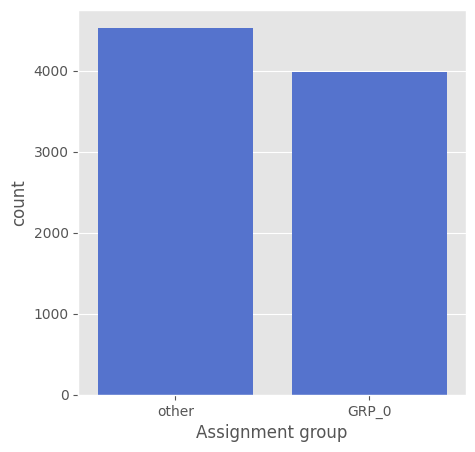

In [20]:
import seaborn as sns
itTicketGRP0DF = open_source_8500.copy()
itTicketGRP0DF['Assignment group']=itTicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = itTicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=itTicketGRP0DF, color='royalblue',order=descending_order)

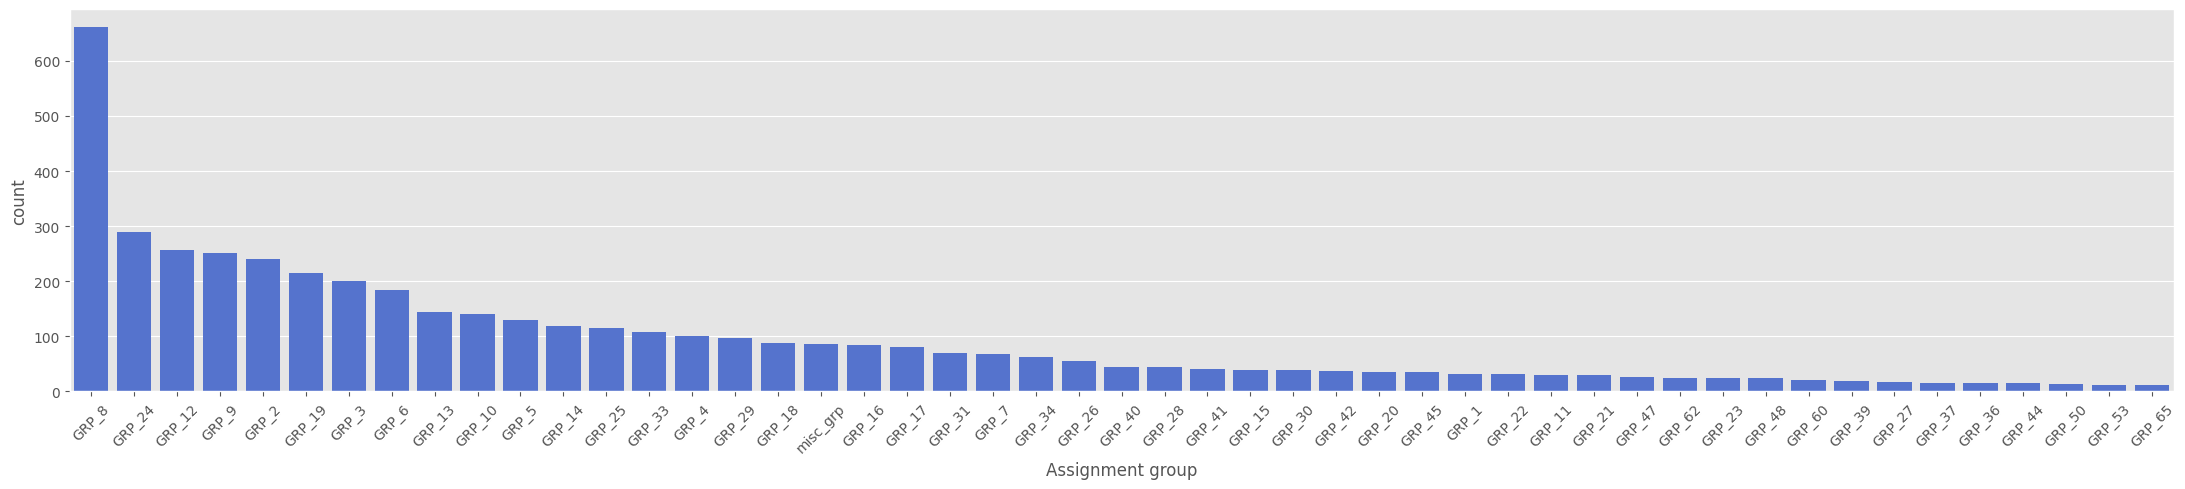

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 過濾掉 'GRP_0' 組別
itTicketOthersDF = open_source_8500[open_source_8500['Assignment group'] != 'GRP_0']

# 獲取按頻率排序的 Assignment group
descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue', order=descending_order)

# 使用 tick_params 設置標籤旋轉
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

661

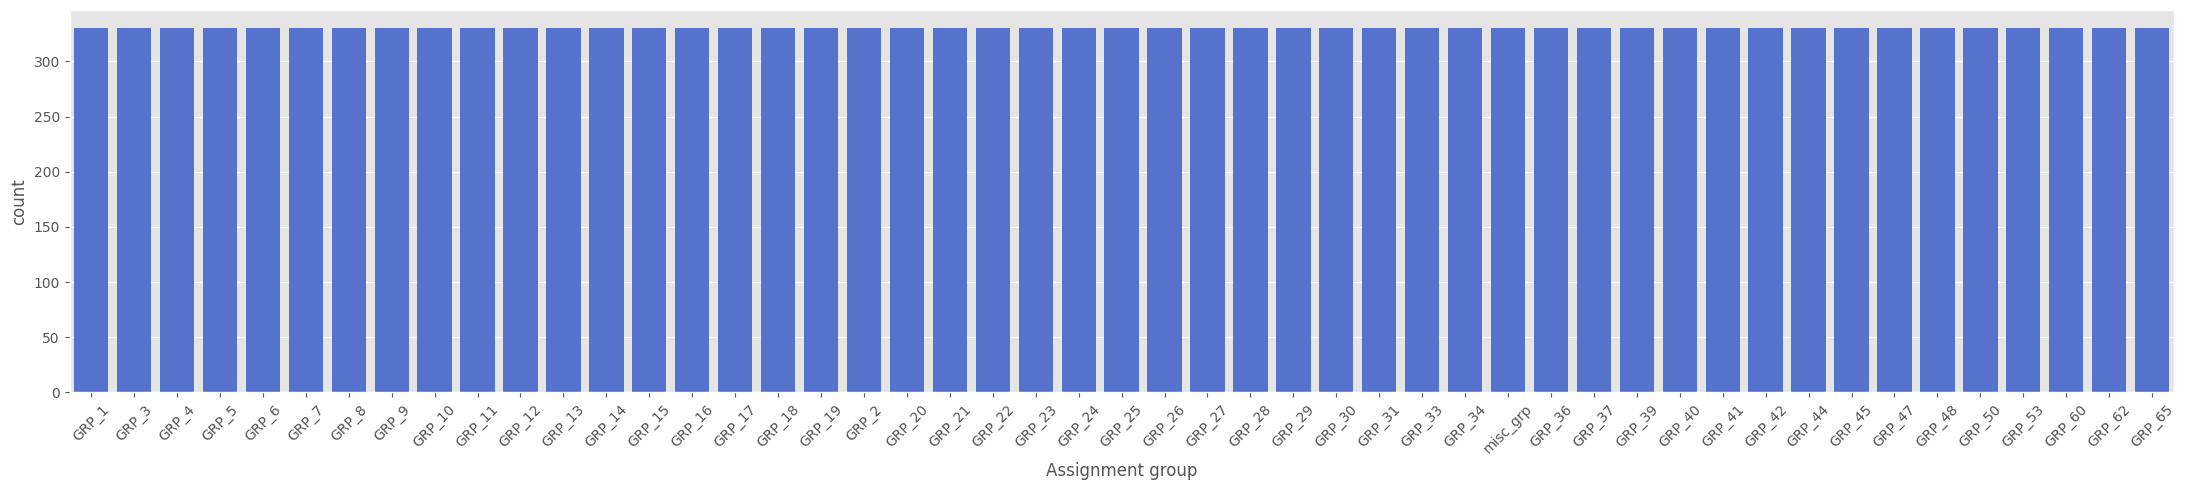

In [23]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化空的 DataFrame
itTicketOthersDF_resampled = pd.DataFrame()

# 進行重抽樣
for grp in itTicketOthersDF['Assignment group'].unique():
    itTicketGrpDF = itTicketOthersDF[itTicketOthersDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers / 2), random_state=123)
    itTicketOthersDF_resampled = pd.concat([itTicketOthersDF_resampled, resampled], ignore_index=True)

# 合併資料
otherGrpsResampled = pd.concat([itTicketGRP0DF, itTicketOthersDF_resampled], ignore_index=True)
otherGrpsResampled.reset_index(inplace=True, drop=True)

# 繪製圖表
plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')

# 使用 tick_params 設置旋轉標籤
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

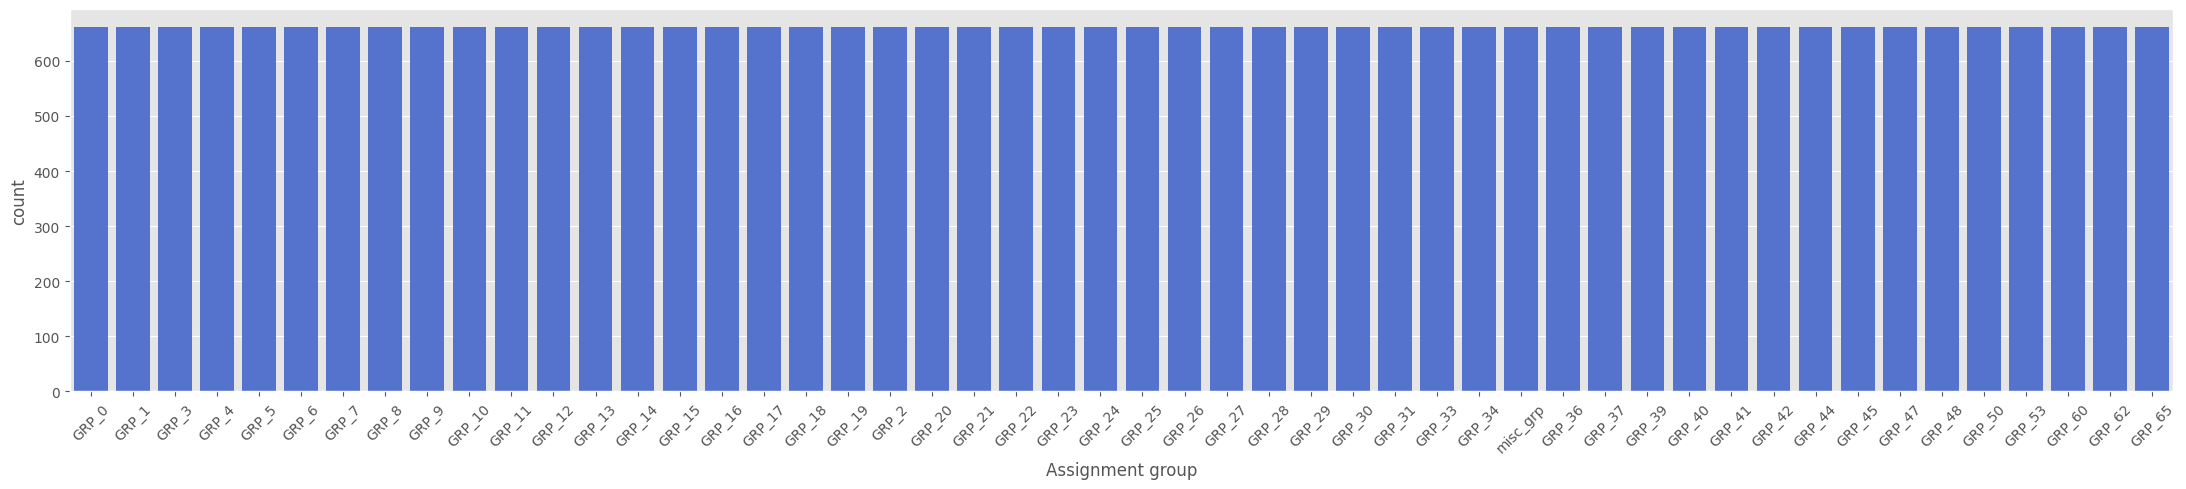

In [24]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化空的 DataFrame
itTicketDF_resampled = pd.DataFrame()

# 進行重抽樣
for grp in open_source_8500['Assignment group'].unique():
    itTicketGrpDF = open_source_8500[open_source_8500['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=661, random_state=123)  # 將 n_samples 設為 661
    itTicketDF_resampled = pd.concat([itTicketDF_resampled, resampled], ignore_index=True)

# 繪製圖表
plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')

# 使用 tick_params 設置旋轉標籤
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
#otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
#itTicketDF['Assignment group'],grp_mapping_all_raw = labelencoder(itTicketDF['Assignment group'])

In [26]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
open_source_8500['Assignment group'],grp_mapping_all_raw = labelencoder(open_source_8500['Assignment group'])

# data split

In [17]:
# Using itTicketDF_resampled dataset 
# df=itTicketDF_resampled
df=open_source_8500

In [18]:
df = df[df['cleanText'].notnull()]
df

,Description,Assignment group,cleanText,Assignment_group_label
0,verified user details employee and manager nam...,GRP_0,verified user details employee manager name ch...,0
1,xd xd xd hello team xd xd my meetings skype me...,GRP_0,hello team meetings skype meetings etc appeari...,0
2,xd xd xd hi xd xd cannot log on to vpn xd xd best,GRP_0,cannot log vpn best,0
3,unable to access hr tool page,GRP_0,unable access tool page,0
4,skype error,GRP_0,skype error,0
...,...,...,...,...
8495,xd xd xd good afternoon xd am not receiving th...,GRP_29,good afternoon receiving emails sent mail plea...,22
8496,telephony software issue,GRP_0,telephony software issue,0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset tifpdchb pedxruyf,0
8498,i am unable to access the machine utilities to...,GRP_62,unable access machine utilities finish drawers...,44


In [19]:
df['Inbound Message'] = df['cleanText']
df['Label']= df['Assignment_group_label']

In [20]:
from sklearn.model_selection import train_test_split
df_train,df_val=train_test_split(df,test_size=0.2 ,random_state=123)  # 80% train & 10 % validation & 10% test set
df_val,df_test=train_test_split(df_val,test_size=0.5 ,random_state=123)

print('Print the shape of datasets...')
print(f'Training dataset : {df_train.shape} ')
print(f'Testing dataset : {df_test.shape}') 
print(f'Validation dataset : {df_val.shape}')

Print the shape of datasets...
Training dataset : (6704, 6) 
Testing dataset : (838, 6)
Validation dataset : (838, 6)


In [21]:
df['cleanText']

0       verified user details employee manager name ch...
1       hello team meetings skype meetings etc appeari...
2                                     cannot log vpn best
3                                 unable access tool page
4                                             skype error
                              ...                        
8495    good afternoon receiving emails sent mail plea...
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    unable access machine utilities finish drawers...
8499    mehreren lassen sich verschiedene prgramdntyme...
Name: cleanText, Length: 8380, dtype: object

# paper train BERT

In [22]:
from transformers import BertTokenizer, BertModel
pre_trained_BERTmodel='bert-base-uncased'
BERT_tokenizer=BertTokenizer.from_pretrained(pre_trained_BERTmodel, do_lower_case=True)

In [23]:
token_lens=[]
for message in df_train['Inbound Message']:
  tokens_message=BERT_tokenizer.encode(message, max_length=150,truncation=True)
  token_lens.append(len(tokens_message))

C:\Users\User\AppData\Local\Temp\ipykernel_15276\1734226617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

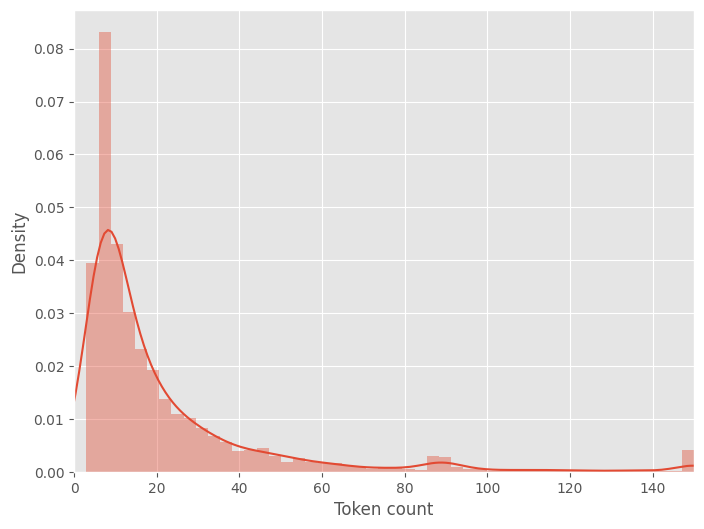

In [24]:
#Plot the tokens
plt.figure(figsize=(8,6))
sns.distplot(token_lens)
plt.xlim([0,150])
plt.xlabel('Token count')

In [25]:
from torch.utils.data import Dataset
class message_Dataset(Dataset):

  def __init__(self, messages, targets, tokenizer, max_length):
    self.messages=messages
    self.targets=targets
    self.tokenizer=tokenizer
    self.max_length=max_length

  def __len__(self):
    return len(self.messages)

  def __getitem__(self,item):
    message = str(self.messages[item])
    targets = self.targets[item]

    encoding = self.tokenizer.encode_plus(
        message,
        max_length=Max_length,
        add_special_tokens=True,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='pt'
       )
           
    return {
        'message_text':message,
        'input_ids':encoding['input_ids'].flatten(),
        'attention_mask':encoding['attention_mask'].flatten(),
        'targets' : torch.tensor(targets,dtype=torch.long)
    }

In [26]:
from torch.utils.data import DataLoader, Dataset
batch_size=8
Max_length= 35
def data_loader(df,tokenizer, max_length, batch):
  ds=message_Dataset(
      messages=df['Inbound Message'].to_numpy(),
      targets=df['Label'].to_numpy(),
      tokenizer=tokenizer,
      max_length=Max_length
  )

  return DataLoader(
      ds,
      batch_size=batch_size,
      num_workers=0 ## 用4會噴錯
  )

# Load datasets
train_DataLoader=data_loader(df_train, BERT_tokenizer,Max_length,batch_size)
test_DataLoader=data_loader(df_test, BERT_tokenizer,Max_length,batch_size)
valid_DataLoader=data_loader(df_val, BERT_tokenizer,Max_length,batch_size)

In [27]:
import time
def measure_execution_time(func, *args, **kwargs):
    import time
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    print(f"函數 {func.__name__} 運行時間: {end_time - start_time:.2f} 秒")
    return result

BERT_data = measure_execution_time(next, iter(train_DataLoader))
print(BERT_data.keys())

函數 next 運行時間: 0.09 秒
dict_keys(['message_text', 'input_ids', 'attention_mask', 'targets'])


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [28]:
#dict_keys(['message_text', 'input_ids', 'attention_mask', 'targets'])
print('Shape of the BERT_data keys...')
print(f"Input_ids : {BERT_data['input_ids'].shape}")
print(f"Attention_mask : {BERT_data['attention_mask'].shape}")
print(f"targets : {BERT_data['targets'].shape}")

Shape of the BERT_data keys...
Input_ids : torch.Size([8, 35])
Attention_mask : torch.Size([8, 35])
targets : torch.Size([8])


In [29]:
input_ids = BERT_data['input_ids'].to(device)
attention_mask = BERT_data['attention_mask'].to(device)
targets=BERT_data['targets'].to(device)
print(input_ids.shape)      # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([8, 35])
torch.Size([8, 35])


In [30]:
BERT_model = BertModel.from_pretrained(pre_trained_BERTmodel)
BERT_model=BERT_model.to(device)

In [31]:
n_classes=df['Label'].nunique()

In [32]:
import torch
from torch import nn

pre_trained_BERTmodel='bert-base-uncased'
n_classes=df['Label'].nunique()

class BERT_SentimentClassifier(nn.Module):
   def __init__(self, n_classes):
     super(BERT_SentimentClassifier, self).__init__()
     self.bert = BertModel.from_pretrained(pre_trained_BERTmodel)
     ### New layers:
     self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
     self.drop = nn.Dropout(p=float(0.6))
     self.linear = nn.Linear(256*2, n_classes)
     #self.drop1 = nn.Dropout(p=float(0.1))
     #self.hidden=nn.Linear(self.bert.config.hidden_size,256)
     #self.drop2 = nn.Dropout(p=float(0.1))
     #self.out = nn.Linear(256, n_classes)
   def forward(self, input_ids, attention_mask):
     sequence_output, pooled_output = self.bert(
         input_ids=input_ids,
         attention_mask=attention_mask,
         return_dict=False
    )
     # sequence_output has the following shape: (batch_size, sequence_length, 768)
     lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
     hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
     output = self.drop(lstm_output)
     linear_output = self.linear(output[:,-1].view(-1,256*2)) ### We are only using the output of the last LSTM cell to perform classification

     #output = self.drop1(pooled_output)
     #output=self.hidden(output)
     #output = self.drop2(output)
     #output=self.out(output)
     return linear_output

In [33]:
BERT_model = BERT_SentimentClassifier(n_classes)
BERT_model=BERT_model.to(device)

In [35]:
import torch.nn.functional as F 
F.softmax(BERT_model(input_ids,attention_mask), dim=1).to(device)

tensor([[0.0175, 0.0200, 0.0154, 0.0182, 0.0201, 0.0187, 0.0192, 0.0167, 0.0202,
         0.0206, 0.0198, 0.0222, 0.0182, 0.0188, 0.0215, 0.0162, 0.0179, 0.0234,
         0.0177, 0.0208, 0.0190, 0.0220, 0.0212, 0.0159, 0.0212, 0.0281, 0.0184,
         0.0192, 0.0205, 0.0219, 0.0205, 0.0189, 0.0226, 0.0214, 0.0195, 0.0207,
         0.0200, 0.0216, 0.0187, 0.0203, 0.0215, 0.0218, 0.0219, 0.0225, 0.0227,
         0.0158, 0.0205, 0.0196, 0.0198, 0.0190],
        [0.0173, 0.0210, 0.0179, 0.0201, 0.0195, 0.0179, 0.0211, 0.0158, 0.0228,
         0.0163, 0.0174, 0.0216, 0.0193, 0.0184, 0.0173, 0.0170, 0.0194, 0.0239,
         0.0214, 0.0189, 0.0162, 0.0247, 0.0226, 0.0168, 0.0215, 0.0199, 0.0201,
         0.0262, 0.0195, 0.0213, 0.0182, 0.0168, 0.0247, 0.0234, 0.0208, 0.0196,
         0.0202, 0.0220, 0.0215, 0.0203, 0.0208, 0.0226, 0.0178, 0.0266, 0.0162,
         0.0171, 0.0212, 0.0212, 0.0173, 0.0186],
        [0.0190, 0.0196, 0.0190, 0.0207, 0.0263, 0.0225, 0.0189, 0.0196, 0.0199,
         

In [36]:
BERT_model

BERT_SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

In [37]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

epochs=20
optimizer=AdamW(BERT_model.parameters(),lr=1e-5,correct_bias=False)
total_steps=len(train_DataLoader)*epochs

scheduler=get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn=nn.CrossEntropyLoss().to(device)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
def train(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_observations
):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    #Feed data to BERT model
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
      )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    torch.autograd.set_detect_anomaly(True)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)     # Clip gradients to avoid exploding gradient problem
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_observations, np.mean(losses)

In [40]:
def eval_model(model, data_loader,device,loss_fn, n_observations):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      # Feed data to BERT model
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_observations, np.mean(losses)

In [38]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001, verbose=True):
        """
        patience: 設定多少個 epochs 內如果 loss 沒有改善，就停止訓練
        min_delta: 設定最小的 loss 改善幅度
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0  # 重置計數器
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} / {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

In [41]:
from tqdm.notebook import tqdm
from collections import defaultdict

# 設定 Early Stopping 參數
early_stopping = EarlyStopping(patience=5, min_delta=0.001, verbose=True)

history = defaultdict(list)
best_accuracy = 0

for epoch in tqdm(range(epochs), desc="Epochs", dynamic_ncols=True):
    print(f'\nEpoch {epoch + 1}/{epochs}')
    print('-' * 10)

    train_acc, train_loss = train(
        BERT_model,
        tqdm(train_DataLoader, desc="Training", leave=True, dynamic_ncols=True),
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f'Train loss: {train_loss:.4f}, accuracy: {train_acc:.4f}')

    val_acc, val_loss = eval_model(
        BERT_model,
        tqdm(valid_DataLoader, desc="Validation", leave=True, dynamic_ncols=True),
        device,
        loss_fn,
        len(df_val)
    )

    print(f'Validation loss: {val_loss:.4f}, accuracy: {val_acc:.4f}')

    # 更新歷史記錄
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # 檢查是否要 Early Stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered. Stopping training.")
        break  # 停止訓練

    # 保存最佳模型
    if val_acc > best_accuracy:
        torch.save(BERT_model.state_dict(), 'best_BERT_model_state_itTicketDF_resampled_gpu.bin')
        best_accuracy = val_acc

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 1/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 2.1659, accuracy: 0.5453


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.8670, accuracy: 0.5919

Epoch 2/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.8248, accuracy: 0.5874


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.7506, accuracy: 0.6122

Epoch 3/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.6370, accuracy: 0.6149


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.7174, accuracy: 0.6098

Epoch 4/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.4909, accuracy: 0.6374


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.6851, accuracy: 0.6074

Epoch 5/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.3522, accuracy: 0.6648


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.6979, accuracy: 0.6337
EarlyStopping counter: 1 / 5

Epoch 6/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.2436, accuracy: 0.6967


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.6882, accuracy: 0.6301
EarlyStopping counter: 2 / 5

Epoch 7/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.1484, accuracy: 0.7196


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.7007, accuracy: 0.6313
EarlyStopping counter: 3 / 5

Epoch 8/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 1.0571, accuracy: 0.7469


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.7304, accuracy: 0.6229
EarlyStopping counter: 4 / 5

Epoch 9/20
----------


Training:   0%|          | 0/838 [00:00<?, ?it/s]

Train loss: 0.9753, accuracy: 0.7679


Validation:   0%|          | 0/105 [00:00<?, ?it/s]

Validation loss: 1.7671, accuracy: 0.6384
EarlyStopping counter: 5 / 5
Early stopping triggered. Stopping training.


In [42]:
from datetime import datetime
save_directory = '../models/'  # 設定保存目錄

current_date = datetime.now()
# 格式化日期為 "YYYY_MMDD" 格式
formatted_date = current_date.strftime('%Y-%m-%d')

# 保存模型的權重、配置檔案和 tokenizer
BERT_model.bert.save_pretrained(save_directory + formatted_date + '_baseline_bert_8500')  # 保存 BERT 模型（包含 config 和 weights）
BERT_tokenizer.save_pretrained(save_directory + formatted_date + '_baseline_bert_8500')  # 保存 tokenizer

('../models/2025-02-03_baseline_bert_8500\\tokenizer_config.json',
 '../models/2025-02-03_baseline_bert_8500\\special_tokens_map.json',
 '../models/2025-02-03_baseline_bert_8500\\vocab.txt',
 '../models/2025-02-03_baseline_bert_8500\\added_tokens.json')

In [43]:
def get_predictions(model, data_loader):
  model = model.eval()
  messages = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:
      texts = d["message_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      messages.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return messages, predictions, prediction_probs, real_values

In [48]:
messages, y_pred, y_probas, y_true = get_predictions(
  BERT_model,
  test_DataLoader
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


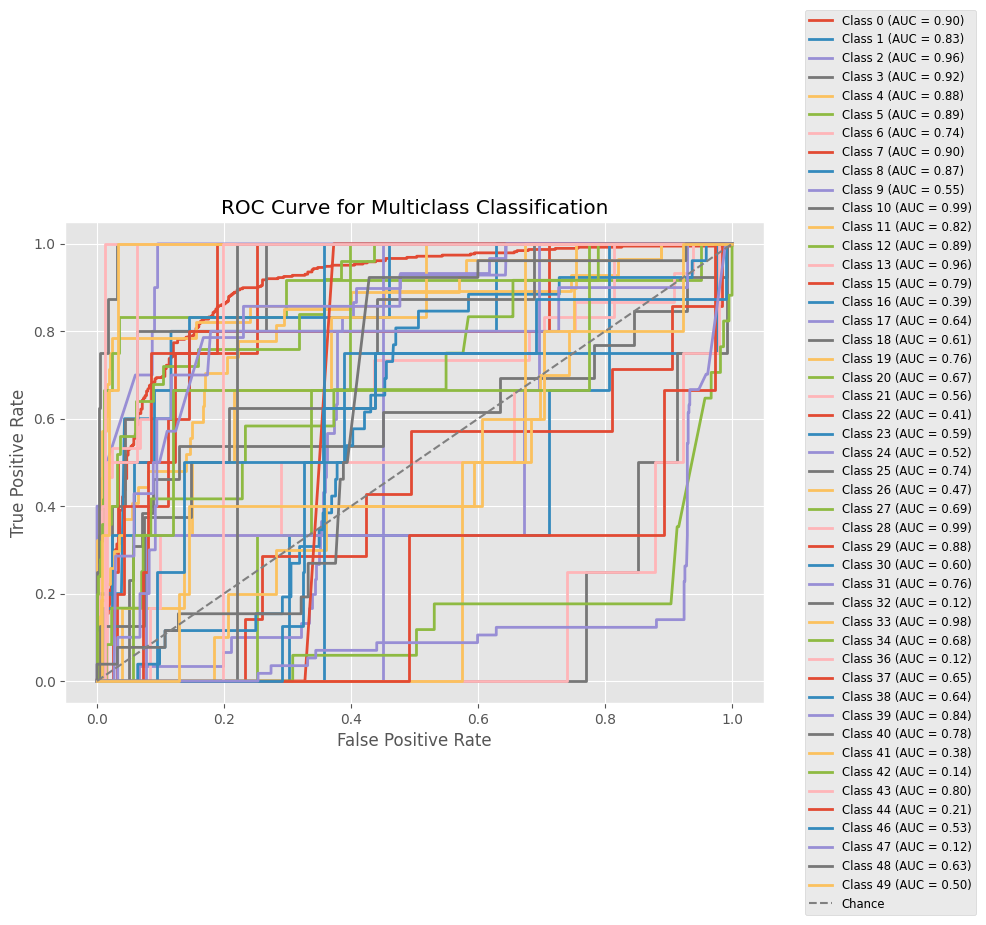

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# 假設 y_true 是真實標籤，y_probas 是多類別的預測概率
classes = np.unique(y_true)  # 獲取所有類別
y_true_binarized = label_binarize(y_true, classes=classes)  # 二值化真實標籤


plt.figure(figsize=(10, 8))  # 調整圖表大小
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')

# 將圖例放在圖表右側外部
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.tight_layout()  # 自動調整圖表和標籤的布局
plt.savefig('roc_curve_multiclass_adjusted.pdf', bbox_inches='tight')
plt.show()

In [53]:
# Calculate precision, recall, f1_score, & roc_auc_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
precision_b, recall_b, f1_score_b, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy_b = accuracy_score(y_test, y_pred)
print(f'Precision for BERT : {round(precision_b,2)}')
print(f'Recall for BERT : {round(recall_b,2)}')
print(f'F1_score for BERT : {round(f1_score_b,2)}')
print(f'Accuracy score for BERT : {round(accuracy_b,2)}')

Precision for BERT : 0.56
Recall for BERT : 0.63
F1_score for BERT : 0.58
Accuracy score for BERT : 0.63


D:\Anaconda3\envs\cuda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       389
           1       0.00      0.00      0.00         5
           2       0.50      0.60      0.55        10
           3       0.00      0.00      0.00         5
           4       0.62      0.57      0.59        28
           5       0.57      0.33      0.42        12
           6       0.45      0.33      0.38        15
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1
          10       0.43      0.75      0.55         8
          11       0.25      0.22      0.24        27
          12       0.24      0.36      0.29        25
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         3
          17       0.90      0.87      0.88        30
          18       0.23    

D:\Anaconda3\envs\cuda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\cuda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\cuda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
df_train

,Description,Assignment group,cleanText,Assignment_group_label,Inbound Message,Label
5150,name language browser microsoft internet explo...,GRP_0,name language browser microsoft internet explo...,0,name language browser microsoft internet explo...,0
942,zugriff auf verzeichnis angefragt xd folder ac...,GRP_0,zugriff auf verzeichnis angefragt folder acces...,0,zugriff auf verzeichnis angefragt folder acces...,0
6656,i am unable to login to attendance tool using ...,GRP_0,unable login attendance tool using single logo...,0,unable login attendance tool using single logo...,0
1624,outlook not working emails not opening crm issue,GRP_0,outlook working emails opening crm issue,0,outlook working emails opening crm issue,0
4272,printer driver update,GRP_0,printer driver update,0,printer driver update,0
...,...,...,...,...,...,...
7490,name language browser microsoft internet explo...,GRP_7,name language browser microsoft internet explo...,46,name language browser microsoft internet explo...,46
7874,i need have access on engineering tool however...,GRP_0,need access engineering tool however tried log...,0,need access engineering tool however tried log...,0
5293,probleme mit ewew,GRP_24,probleme mit ewew,17,probleme mit ewew,17
1355,xd xd xd hi xd xd please provide access pu fil...,GRP_12,please provide access file hostname department...,4,please provide access file hostname department...,4


In [24]:
from transformers import BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader

# 初始化 BERT 的 tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class CustomDataset(Dataset):
    def __init__(self, messages, labels, tokenizer, max_length):
        self.messages = messages
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.messages)

    def __getitem__(self, idx):
        message = str(self.messages[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            message,
            max_length=self.max_length,
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 定義數據集
MAX_LENGTH = 35
train_dataset = CustomDataset(
    messages=df_train['Inbound Message'].tolist(),
    labels=df_train['Label'].tolist(),
    tokenizer=tokenizer,
    max_length=MAX_LENGTH
)

val_dataset = CustomDataset(
    messages=df_val['Inbound Message'].tolist(),
    labels=df_val['Label'].tolist(),
    tokenizer=tokenizer,
    max_length=MAX_LENGTH
)

test_dataset = CustomDataset(
    messages=df_test['Inbound Message'].tolist(),
    labels=df_test['Label'].tolist(),
    tokenizer=tokenizer,
    max_length=MAX_LENGTH
)

# 創建 DataLoader
BATCH_SIZE = 8
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [25]:
from transformers import BertForSequenceClassification

# 初始化 BERT 模型
NUM_LABELS = len(df_train['Label'].unique())  # 獲取標籤數量
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_LABELS)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
from transformers import AdamW
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = CrossEntropyLoss()

In [27]:
from tqdm import tqdm
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

EPOCHS = 3

def train_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0

    for batch in tqdm(dataloader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
    
    return total_loss / len(dataloader)

def eval_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)
            total_loss += loss.item()

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
    
    accuracy = correct_predictions.double() / len(dataloader.dataset)
    return total_loss / len(dataloader), accuracy

# 開始訓練
for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    train_loss = train_epoch(model, train_dataloader, optimizer, criterion)
    val_loss, val_accuracy = eval_model(model, val_dataloader, criterion)
    print(f"Train loss: {train_loss} | Val loss: {val_loss} | Val accuracy: {val_accuracy}")

Epoch 1/3


100%|██████████| 419/419 [02:56<00:00,  2.37it/s]


Train loss: 1.9951407553757006 | Val loss: 1.6513297152969073 | Val accuracy: 0.6217183770883055
Epoch 2/3


100%|██████████| 419/419 [02:54<00:00,  2.40it/s]


Train loss: 1.5092071169600567 | Val loss: 1.4860900246872093 | Val accuracy: 0.6288782816229117
Epoch 3/3


100%|██████████| 419/419 [02:54<00:00,  2.40it/s]


Train loss: 1.1922778211943006 | Val loss: 1.4195926948538367 | Val accuracy: 0.6515513126491647


In [28]:
test_loss, test_accuracy = eval_model(model, test_dataloader, criterion)
print(f"Test loss: {test_loss} | Test accuracy: {test_accuracy}")

Test loss: 1.4397736000564862 | Test accuracy: 0.630071599045346


In [47]:
from datetime import datetime
def model_save(fname):
    # 取得當前日期和時間
    current_date = datetime.now()
    # 格式化日期為 "YYYY_MMDD" 格式
    formatted_date = current_date.strftime('%Y_%m%d')
    model.save_pretrained('../models/' + formatted_date + '_' + fname)
    tokenizer.save_pretrained('../models/' + formatted_date + '_' + fname)

In [48]:
model_save('gpt_bert_ver2_把少於10筆的data變成label65')